In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
books = pd.read_csv('Books.csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')
books.head()

<ipython-input-3-ecf73cb6c141>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
print('number of book data:', len(books.ISBN.unique()))

number of book data: 271360


In [6]:
print('total book rating from readers:', len(ratings.ISBN.unique()))

total book rating from readers: 340556


In [7]:
print('amound of user:', len(users['User-ID'].unique()))

amound of user: 278858


In [8]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [10]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [13]:
books.duplicated().sum()

0

In [14]:
users.duplicated().sum()

0

In [15]:
ratings.duplicated().sum()

0

In [16]:
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [17]:
temp = (books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')
books = books.drop(books[temp].index)
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [18]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int64
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


In [19]:
#remove uneffective variables

books.drop(labels = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [20]:
print("Number of Book ISBN numbers:", len(books['ISBN'].unique()))
print("Number of book titles:", len(books['Book-Title'].unique()))
print('Number of book authors:', len(books['Book-Author'].unique()))
print('Number of Publication Years:', len(books['Year-Of-Publication'].unique()))
print('Number of publisher names:', len(books['Publisher'].unique()))

Number of Book ISBN numbers: 271357
Number of book titles: 242132
Number of book authors: 102022
Number of Publication Years: 116
Number of publisher names: 16805


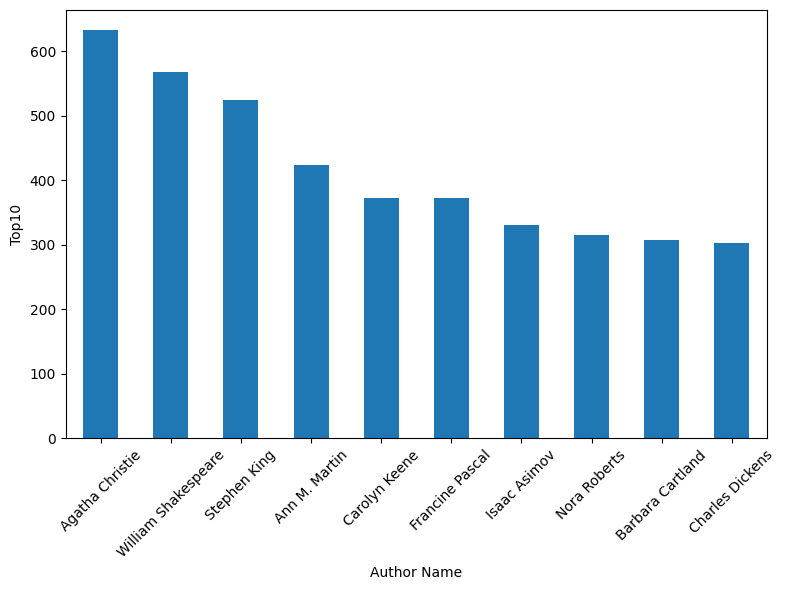

In [21]:
#grouped by author 
author_count = books.groupby('Book-Author')['Book-Title'].count()
sorted_author = author_count.sort_values(ascending=False)
top10_authors = sorted_author.head(10)

plt.figure(figsize=(8, 6))
top10_authors.plot(kind = 'bar')
plt.xlabel('Author Name')
plt.ylabel('Top10')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [23]:
print('Number of User-IDs:', len(ratings['User-ID'].unique()))
print('Number of books based on ISBN:', len(ratings['ISBN'].unique()))

print('Number of book ratings:')
sorted_ratings = ratings['Book-Rating'].value_counts().sort_index()
pd.DataFrame({'Book-Rating': sorted_ratings.index, 'Sum': sorted_ratings.values})

Number of User-IDs: 105283
Number of books based on ISBN: 340556
Number of book ratings:


,Book-Rating,Sum
0,0,716109
1,1,1770
2,2,2759
3,3,5996
4,4,8904
5,5,50974
6,6,36924
7,7,76457
8,8,103736
9,9,67541


In [24]:
# ratings will be used as collaborative filtering, too many data, only pick 10000

df_rating = ratings[:10000]
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
9995,243,0425164403,0
9996,243,0440224764,0
9997,243,0440225701,0
9998,243,0440226430,0


In [25]:
# user.file will not be used. Merge books and ratings tables together 
books = pd.merge(ratings, books, on='ISBN', how='left')
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic


In [26]:
books.groupby('ISBN').sum()

<ipython-input-26-367898172105>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books.groupby('ISBN').sum()


,User-ID,Book-Rating,Year-Of-Publication
ISBN,,,
0330299891,271009,6,0.0
0375404120,356057,3,0.0
0586045007,89192,0,0.0
9022906116,100868,7,0.0
9032803328,89192,0,0.0
...,...,...,...
cn113107,107301,0,0.0
ooo7156103,266146,7,0.0
§423350229,85250,0,0.0


In [27]:
#drop missing values

books2 = books.dropna()
books2

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books


In [28]:
#ISBN < books number, so some books dont have ISBN

books3 = books2.sort_values('ISBN', ascending=True)
print(len(books3['ISBN'].unique()))
print(len(books3['Book-Title'].unique()))

270145
241066


In [29]:
#some books have not only one ISBN

books4 = books3.drop_duplicates('ISBN')
books4

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
103678,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com


In [30]:
isbn_id = books4['ISBN'].tolist()

book_title = books4['Book-Title'].tolist()

book_author = books4['Book-Author'].tolist()

year_of_publication = books4['Year-Of-Publication'].tolist()

publisher = books4['Publisher'].tolist()

print(len(isbn_id))
print(len(book_title))
print(len(book_author))
print(len(year_of_publication))
print(len(publisher))

270145
270145
270145
270145
270145


In [31]:
#combine all features into a dictionary

books_new = pd.DataFrame({
    'isbn': isbn_id,
    'book_title': book_title,
    'book_author': book_author,
    'year_of_publication': year_of_publication,
    'publisher': publisher

})

books_new

,isbn,book_title,book_author,year_of_publication,publisher
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
1,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins
2,0001046438,Liar,Stephen Fry,0.0,Harpercollins Uk
3,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...
270140,B000234N76,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
270141,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
270142,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
270143,B0002JV9PY,The Blockade Runners,Jules Verne,0.0,Digireads.com


In [32]:
#content-based filtering 
books_new = books_new[:10000]

In [33]:
#convert user_id and encoding

user_ids = df_rating['User-ID'].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [34]:
#same, convert isbn and encoding

isbn_id = df_rating['ISBN'].unique().tolist()
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_id)}
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_id)}

In [35]:
#map those two 

pd.options.mode.chained_assignment = None # "warn" or "raise" to turn it back on

df_rating['user'] = df_rating['User-ID'].map(user_to_user_encoded)
df_rating['book_title'] = df_rating['ISBN'].map(isbn_to_isbn_encoded)

In [36]:
#check data before modeling

num_users = len(user_to_user_encoded)

num_book_title = len(isbn_to_isbn_encoded)

df_rating['Book-Rating'] = df_rating['Book-Rating'].values.astype(np.float32)
min_rating = min(df_rating['Book-Rating'])
max_rating = max(df_rating['Book-Rating'])

print('Number of Users: {}, Number of Books: {}, Min Rating: {}, Max Rating: {}'.format(
     num_users, num_book_title, min_rating, max_rating
))

Number of Users: 941, Number of Books: 9340, Min Rating: 0.0, Max Rating: 10.0


In [37]:
data = books_new
data.sample(5)

,isbn,book_title,book_author,year_of_publication,publisher
7969,0060964081,Significant Others,Armistead Maupin,1989.0,HarperCollins Publishers
1353,002029865X,The Steps of the Sun,Walter Tevis,1990.0,Simon &amp; Schuster
7353,006092845X,Twelve Golden Threads: Lessons for Successful ...,Aliske Webb,1997.0,Perennial
7455,0060930756,RealAge: Are You as Young as You Can Be?,Michael F. Roizen,2001.0,HarperResource
8864,0061013722,The Clairvoyant,Marian Thurm,1999.0,HarperTorch


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tf = TfidfVectorizer()

# Perform IDF calculations on book_author data
tf.fit(data['book_author'])

# Mapping array from integer index features to name features
tf.get_feature_names_out()

array(['aaron', 'ab', 'abbey', ..., 'zulfikar', 'zweifel', 'zwinger'],
      dtype=object)

In [39]:
tfidf_matrix = tf.fit_transform(data['book_author'])

# View the tfidf matrix size
tfidf_matrix.shape

(10000, 5235)

In [40]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
#correlation between author <--> title
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.book_title
).sample(15, axis=1).sample(10, axis=0)

,bass,janet,hatcher,laurien,brechner,nathanson,aird,marcus,theodore,kael,barks,beattie,hope,logue,stafford
book_title,,,,,,,,,,,,,,,
Renato's Luck,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Assassination of Jesse James by the Coward Robert Ford,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spring Story (Brambly Hedge),0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fast Courting,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baseball Trade Register,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Voyage For Madmen,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agatha Christie: A Biography,0.0,0.683456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
On a Wicked Dawn (Cynster Novels),0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Green Behind the Glass: Love Stories,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#similarity between each title
from sklearn.metrics.pairwise import cosine_similarity

# Calculating cosine similarity on the tf-idf matrix
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [43]:
# Create a dataframe from the cosine_sim variable with rows and columns in the form of book titles
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)

# View the similarity matrix for each book title
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (10000, 10000)


book_title,Petrella at Q (Perennial British Mystery),FAIRY AND FOLK TALES OF IRELAND,Gulag Archipelago One,Prisoner of My Desire,The Perricone Prescription Personal Journal : Your Total Body and Face Rejuvenation Daybook
book_title,,,,,
The Complete Idiot's Guide to Getting Along with Difficult People,0.0,0.0,0.0,0.0,0.0
Lydia: A Novel,0.0,0.0,0.0,0.0,0.0
Solid State Physics,0.0,0.0,0.0,0.0,0.0
The Good Years: From 1900 to the First World War.,0.0,0.0,0.0,0.0,0.0
Favorite Garden Tips (Canadian Garden Collection),0.0,0.0,0.0,0.0,0.0
Studies in the short story,0.0,0.0,0.0,0.0,0.0
Heart Songs and Other Stories,0.0,0.0,0.0,0.0,0.0
Native Son: And How Bigger Was Born,0.0,0.0,0.0,0.0,0.0
Whirlwind : A Novel,0.0,0.0,0.0,0.0,0.0


In [44]:
def book_recommendation(book_title, similarity_data=cosine_sim_df, items=data[['book_title', 'book_author']], k=5):
     # Retrieve data by using argpartition to partition indirectly along a given axis
     # Dataframe converted to numpy
     # Range(start, stop, step)
     index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))

     # Retrieve data with the greatest similarity from the existing index
     closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
     # Drop book_title so that the name of the book you are looking for does not appear in the recommendation list
     closest = closest.drop(book_title, errors='ignore')

     return pd.DataFrame(closest).merge(items).head(k)

In [47]:
#test an example

book_title_test = "Whirlwind : A Novel" 

data[data.book_title.eq(book_title_test)]

,isbn,book_title,book_author,year_of_publication,publisher
6274,0060596503,Whirlwind : A Novel,Joseph Garber,2004.0,HarperCollins


In [48]:
book_recommendation(book_title_test)

,book_title,book_author
0,Beyond Ritalin : Facts About Medication and Ot...,Stephen W. Garber
1,"Mythic Worlds, Modern Words: On the Art of Jam...",Joseph Campbell
2,The Way of the Seeded Earth: Mythologies of th...,Joseph Campbell
3,Transformations of Myth Through Time,Joseph Campbell
4,The Inner Reaches of Outer Space: Metaphor as ...,Joseph Campbell


In [49]:
# split train and val, shuffle

df_rating = df_rating.sample(frac=1, random_state=42)
df_rating

,User-ID,ISBN,Book-Rating,user,book_title
6252,278418,0439207398,0.0,678,5902
4684,278418,0307100324,0.0,678,4379
1731,277427,0553578936,0.0,255,1686
4742,278418,0307109905,0.0,678,4436
4521,278418,0140463704,0.0,678,4218
...,...,...,...,...,...
5734,278418,0373706367,0.0,678,5401
5191,278418,0373074050,0.0,678,4870
5390,278418,0373121962,0.0,678,5066
860,277087,8472230082,5.0,139,850


In [50]:
# map title and user to single value

# create a variable x to match user data and book title into one value
x = df_rating[['user', 'book_title']].values

# create a y variable to create a rating of the results (max-min scaling)
y = df_rating['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# split

train_indices = int(0.9 * df_rating.shape[0])
x_train, x_val, y_train, y_val = (
     x[:train_indices],
     x[train_indices:],
     y[:train_indices],
     y[train_indices:]
)

print(x, y)

[[ 678 5902]
 [ 678 4379]
 [ 255 1686]
 ...
 [ 678 5066]
 [ 139  850]
 [ 678 6857]] [0.  0.  0.  ... 0.  0.5 0. ]
